# Random Forest Classification

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('DMV_Written_Tests.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[62.0730638  96.76882412]
 [61.10666454 96.51142588]
 [74.775893   89.5298129 ]
 [67.31925747 66.58935318]
 [47.26426911 88.475865  ]
 [75.39561147 85.75993667]
 [88.91389642 69.8037889 ]
 [94.09433113 77.15910509]
 [80.27957401 92.11606081]
 [99.27252693 60.999031  ]
 [93.1143888  38.80067034]
 [70.66150955 92.92713789]
 [97.64563396 68.86157272]
 [30.05882245 49.59297387]
 [58.84095622 75.85844831]
 [30.28671077 43.89499752]
 [35.28611282 47.02051395]
 [94.44336777 65.56892161]
 [51.54772027 46.85629026]
 [79.03273605 75.34437644]
 [53.97105215 89.20735014]
 [67.94685548 46.67857411]
 [83.90239366 56.30804622]
 [74.78925296 41.57341523]
 [45.08327748 56.31637178]
 [90.44855097 87.50879176]
 [71.79646206 78.45356225]
 [34.62365962 78.02469282]
 [40.23689374 71.16774802]
 [61.83020602 50.25610789]
 [79.94481794 74.16311935]
 [75.01365839 30.60326323]
 [54.63510555 52.21388588]
 [34.21206098 44.2095286 ]
 [90.54671411 43.39060181]
 [95.86155507 38.22527806]
 [85.40451939 57.05198398]
 

In [5]:
print(y_train)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 0]


In [6]:
print(X_test)

[[80.19018075 44.82162893]
 [42.07545454 78.844786  ]
 [35.84740877 72.90219803]
 [49.58667722 59.80895099]
 [99.8278578  72.36925193]
 [74.49269242 84.84513685]
 [69.07014406 52.74046973]
 [60.45788574 73.0949981 ]
 [50.28649612 49.80453881]
 [83.48916274 48.3802858 ]
 [34.52451385 60.39634246]
 [55.48216114 35.57070347]
 [60.45555629 42.50840944]
 [69.36458876 97.71869196]
 [75.02474557 46.55401354]
 [61.37928945 72.80788731]
 [50.53478829 48.85581153]
 [77.92409145 68.97235999]
 [52.04540477 69.43286012]
 [76.0987867  87.42056972]
 [82.36875376 40.61825516]
 [56.2538175  39.26147251]
 [60.18259939 86.3085521 ]
 [64.03932042 78.03168802]
 [62.22267576 52.06099195]]


In [7]:
print(y_test)

[1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-0.21231162  1.56561722]
 [-0.25955531  1.55187648]
 [ 0.40868272  1.17917568]
 [ 0.04415538 -0.04545932]
 [-0.93625882  1.12291258]
 [ 0.43897846  0.97792765]
 [ 1.09983741  0.12613752]
 [ 1.3530897   0.51878779]
 [ 0.67773732  1.31723786]
 [ 1.60623254 -0.34388858]
 [ 1.30518395 -1.52890797]
 [ 0.20754573  1.36053574]
 [ 1.52669976  0.07583901]
 [-1.77736947 -0.95278034]
 [-0.37031741  0.44935458]
 [-1.76622885 -1.25695651]
 [-1.52182658 -1.09010646]
 [ 1.37015281 -0.09993322]
 [-0.72685674 -1.09887325]
 [ 0.61678403  0.42191178]
 [-0.608389    1.16196159]
 [ 0.07483633 -1.1083603 ]
 [ 0.85484358 -0.59430833]
 [ 0.40933583 -1.38088999]
 [-1.04287944 -0.59386388]
 [ 1.174861    1.07128712]
 [ 0.26302936  0.58789005]
 [-1.55421147  0.56499563]
 [-1.27980121  0.19895002]
 [-0.22418404 -0.91738012]
 [ 0.66137234  0.3588525 ]
 [ 0.42030619 -1.96651174]
 [-0.57592589 -0.81286768]
 [-1.574333   -1.24016584]
 [ 1.17965983 -1.28388277]
 [ 1.43948275 -1.55962424]
 [ 0.92827695 -0.55459455]
 

In [10]:
print(X_test)

[[ 0.67336722 -1.20748997]
 [-1.18992077  0.60877482]
 [-1.4943869   0.2915405 ]
 [-0.82272488 -0.40741885]
 [ 1.63338062  0.26309013]
 [ 0.39483809  0.92909271]
 [ 0.12974975 -0.78475695]
 [-0.2912717   0.30183278]
 [-0.78851332 -0.94148632]
 [ 0.83464225 -1.0175175 ]
 [-1.55905834 -0.37606202]
 [-0.53451647 -1.70133391]
 [-0.29138558 -1.33097701]
 [ 0.14414407  1.6163242 ]
 [ 0.4208482  -1.11500974]
 [-0.24622768  0.28650589]
 [-0.77637523 -0.99213242]
 [ 0.56258649  0.08175319]
 [-0.70252678  0.10633616]
 [ 0.4733541   1.06657755]
 [ 0.77986959 -1.43187948]
 [-0.49679305 -1.50430888]
 [-0.30472943  1.00721449]
 [-0.11618861  0.56536905]
 [-0.20499765 -0.82102965]]


## Training the Random Forest Classification model on the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[60,70]])))

[1]


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  1]
 [ 2 12]]


0.88

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


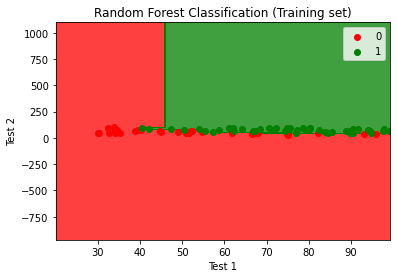

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


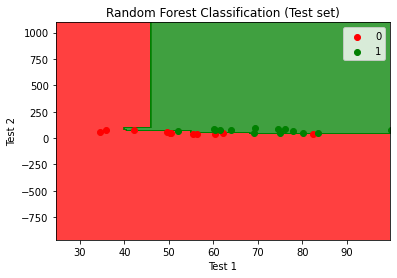

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show()